# Unit Quaternions

Os quaternions permitem representar um rotação 3D e como são unitários significa que: $||q|| = 1$

Estes estão numa esfera, e de forma resumida, podemos representá-los assim: $q = (x,y,z,w)$ OU $q = (\vec{v}, w) = (\sin{\frac{\theta}{2}} \hat{n}, \cos{\frac{\theta}{2}})$

Onde, $\hat{n}$, é o eixo de rotação unitário e, $\theta$, o ângulo de rotação.


Apesar de parecer que é um vetor de coordenadas homogéneas, na realidade, o quaternion é um **conjunto** dos ***números complexos***!

Então a forma mais correta de representar seria: $q = w + \vec{v} = w + xi + yj + zk$

Onde $i^2 = j^2 = k^2 = ijk = -1$,

$\vec{v}$ é parte imaginária e $w$ a parte real

Podemos converter o quaternion em uma matriz de rotação utilizando a fórmula de Rodriguez:

* Para uma matriz de rotação: 

    $R(\hat{n}, \theta) = I + \sin{\theta} \cdot [\hat{n}]_{\times} + (1 - \cos{\theta}) \cdot [\hat{n}]_{\times}^2$

* Para uma matriz de rotação usando quaternions:

    $R(\hat{n}, \theta) = I + 2w[\vec{v}]_{\times} + 2[\vec{v}]_{\times}^2$

Aqui temos a matriz do operador de um produto vetorial referente à parte imaginária do nosso quaternion, $\vec{v}$.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def plot(*args):
    """ Plota múltiplos vetores no espaço 3D """
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlim([-2, 3])
    ax.set_ylim([-2, 3])
    ax.set_zlim([-2, 3])

    for c, vec in args:
        vec = vec.flatten()
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=c)

In [28]:
# Ângulo de rotação
theta = np.deg2rad(45)

# Eixo de rotação unitário
axis_vec = np.array([
    [0],
    [0], 
    [1]
])

# Parte imaginária, v
v = np.sin(theta / 2) * axis_vec

# Parte real
w = np.cos(theta / 2)

# Operador do produto vetorial, v, na forma matricial
v_vec_cross = np.array([
    [0, -v[2,0], v[1,0]],
    [v[2,0], 0, -v[0,0]],
    [-v[1,0], v[0,0], 0]
])

# Operador do produto vetorial ao quadrado, v, na forma matricial
# Dá para simplifcar as expressões, eu não o faço porque confunde-me mais

v_vec_cross_2 = np.array([
    [-v[2,0] * v[2,0] + v[1,0]*(-v[1,0]), v[0,0] * v[1,0], -v[0,0] * (-v[2,0])],
    [-v[0,0] * (-v[1,0]), -v[2,0]*v[2,0] + v[0,0] * (-v[0,0]), v[2,0] * v[1,0]],
    [v[0,0] * v[2,0], -v[2,0] * (-v[1,0]), -v[1,0] * v[1,0] + v[0,0] * (-v[0,0])]
])

Vamos então testar se temos as mesmas rotações ao criar 2 matrizes de rotação (uma com ângulo/eixo e outra com quaternions)

In [29]:

def vector_crosses(axis_vec):
    # Matrizes do produto vetorial para a representação ângulo/eixo
    axis_vec_cross = np.array([
        [0, -axis_vec[2,0], axis_vec[1,0]],
        [axis_vec[2,0], 0, -axis_vec[0,0]],
        [-axis_vec[1,0], axis_vec[0,0], 0]
    ])

    axis_vec_cross_2 = np.array([
        [-axis_vec[2,0] * axis_vec[2,0] + axis_vec[1,0]*(-axis_vec[1,0]), axis_vec[0,0] * axis_vec[1,0], -axis_vec[0,0] * (-axis_vec[2,0])],
        [-axis_vec[0,0] * (-axis_vec[1,0]), -axis_vec[2,0]*axis_vec[2,0] + axis_vec[0,0] * (-axis_vec[0,0]), axis_vec[2,0] * axis_vec[1,0]],
        [axis_vec[0,0] * axis_vec[2,0], -axis_vec[2,0] * (-axis_vec[1,0]), -axis_vec[1,0] * axis_vec[1,0] + axis_vec[0,0] * (-axis_vec[0,0])]
    ])

    return axis_vec_cross, axis_vec_cross_2

In [30]:
# Obter os operadores do produto vetorial com respeito ao eixo de rotação
axis_vec_cross, axis_vec_cross_2 = vector_crosses(axis_vec)

# Matriz de rotação angulo/eixo
R = np.identity(3) + np.sin(theta) * axis_vec_cross + (1 - np.cos(theta)) * axis_vec_cross_2

# Matriz de rotação quaternion
R_quat = np.identity(3) + 2*w*v_vec_cross + 2*v_vec_cross_2

print(R)
print()
print(R_quat)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Podemos ver alguns erros de aproximação, mas são irrelevantes, neste caso. As matrizes são idênticas:

In [31]:
# Se passar neste assert significa que são praticamente iguais
np.testing.assert_almost_equal(R, R_quat)

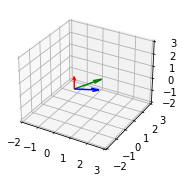

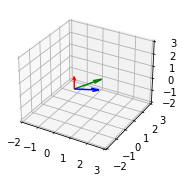

In [32]:
# Vetor a ser rotacionado
my_vec = np.array([
    [1.5],
    [0], 
    [0.5]
])

# Plotar a rotação com as 2 matrizes
# Vermelho - Eixo de rotação
# Azul - Nosso vetor original
# Verde - Vetor rotacionado
plot(("r", axis_vec), ("b", my_vec), ("g", R @ my_vec))
plot(("r", axis_vec), ("b", my_vec), ("g", R_quat @ my_vec))

Podemos pensar em criar um tipo mais complexo (usando classes) que permita-nos representar Quaternions.

In [33]:
class Quaternion(object):
    def __init__(self, rot_axis, angle, real=None, imag=None):
        self.rot_axis = self.normalize(rot_axis)
        self.angle = angle

        self.real = np.cos(angle / 2) if real is None else real
        self.imag = np.sin(angle / 2) * self.rot_axis if imag is None else imag

    def __str__(self):

        string = str(np.round(self.real, 3))

        for ele, imag_vec in zip(self.imag.flatten(), ["i", "j", "k"]):

            if np.round(ele, 8) == 0:
                continue
            elif ele < 0:
                # Se negarmos um número negativo ele fica positivo, escusa-se de usar abs()
                string += " - " + str(-np.round(ele, 3)) + imag_vec
            else:
                string += " + " + str(np.round(ele, 3)) + imag_vec

        return string

    def normalize(self, vec):
        
        length = np.linalg.norm(vec)

        if length != 1:
            vec = vec / length

        return vec

    def angle_axis(self):
        angle = 2 * np.arctan2(self.normalize(self.imag), self.real)
        axis_vec = self.normalize(self.imag)

        return axis_vec, angle


    def inverse(self):
        # Inversa do Quaternion
        return Quaternion(self.rot_axis, self.angle, real=self.real, imag=-self.imag) 

    def __mul__(self, q2):
        # produto vetoriala (cross) não funciona com arrays multidimensionais
        # então fazemos flatten (1D) e depois voltamos a transformar numa array multidimensional
        imag = np.cross(self.imag.flatten(), q2.imag.flatten()).reshape(3, 1) + (self.real * q2.imag) + (q2.real * self.imag)
        real = (self.real * q2.real) - ( self.imag.flatten() @ q2.imag.flatten() )

        return Quaternion(self.rot_axis, self.angle, real=real, imag=imag)
    
    def __truediv__(self, q2):
        return self * q2.inverse()


Vamos testar a multiplicação e divisão de Quaternions!

In [40]:
theta = np.deg2rad(45)

axis_vec = np.array([
    [0],
    [0],
    [1]
])

q1 = Quaternion(axis_vec, theta)
q2 = Quaternion(axis_vec, theta)

print("q1 = ", q1)
print("q2 = ", q2)
q3 = q1 * q2
print("q1 * q2 = ", q3)

q1 =  0.924 + 0.383k
q2 =  0.924 + 0.383k
q1 * q2 =  0.707 + 0.707k


In [41]:
print(q1 / q3)

0.924 - 0.383k


Podemos agora testar rotacionar com a nossa matriz, $R$, e com o nosso Quaternion, $q_1$, em que ambos representação a rotação por um dado ângulo e eixo unitário.

Veremos que o resultado é o mesmo, só precisamos de saber que tendo o Quaternion do eixo de rotação/ângulo, temos de converter o nosso vetor Euclideano em um Quaternion:

$\vec{v_q} = 0 + \vec{v}$ - onde 0 é a parte real e o $\vec{v}$ a parte imaginária.

Tendo isto, para criar o Quaterion rotacionado, temos:

$\vec{v_{rot}} = q_1 \vec{v_q} q_1^{-1}$

In [42]:
# Converter o meu vetor em um quaternion
my_quat = Quaternion(axis_vec, theta, real=0.0, imag=my_vec)

# Quaternion rotacionado 
my_vec_rot_quat = (q1 * my_quat) * q1.inverse()

# Obter os operadores do produto vetorial com respeito ao eixo de rotação
axis_vec_cross, axis_vec_cross_2 = vector_crosses(axis_vec)

# Matriz de rotação angulo/eixo
R = np.identity(3) + np.sin(theta) * axis_vec_cross + (1 - np.cos(theta)) * axis_vec_cross_2

# Vetor rotacionado
my_vec_rot = R @ my_vec

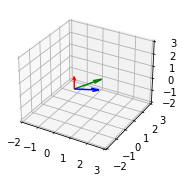

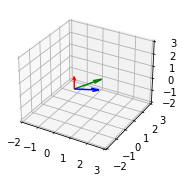

In [43]:
# Plotar a rotação com o quaternion e com a matriz de rotação
# Vermelho - Eixo de rotação
# Azul - Nosso vetor original
# Verde - Vetor rotacionado
plot(("r", axis_vec), ("b", my_vec), ("g", my_vec_rot_quat.imag))
plot(("r", axis_vec), ("b", my_vec), ("g", my_vec_rot))

Podemos observar que assim como anteriormente, quando estávamos a usar 2 matrizes de rotação, ambas pela fórmula de Rodriguez, o vetor rotacionado é o mesmo!